In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv(
    "train_data.txt",
    sep=r"\s*:::\s*",
    engine="python",
    names=["id", "title", "genre", "description"]
)

In [64]:
df.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [65]:
df.columns

Index(['id', 'title', 'genre', 'description'], dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [67]:
df.shape

(54214, 4)

In [68]:
df.isnull().sum()

,0
id,0
title,0
genre,0
description,0


In [69]:
unique=df['genre'].unique()
unique

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

In [70]:
genre_count=df['genre'].value_counts()
genre_count

,count
genre,
drama,13613
documentary,13096
comedy,7447
short,5073
horror,2204
thriller,1591
action,1315
western,1032
reality-tv,884


In [71]:
import nltk

In [72]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [73]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [74]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [75]:
def remove(text):
  words = word_tokenize(text)
  cleaned=[]
  for i in words:
    if i not in stop_words:
      cleaned.append(i)
  return " ".join(cleaned)


In [76]:
df.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [77]:
import re

def clean_text(text):
  if pd.isna(text):
      return " "
  text = text.lower()
  text = re.sub(r'[^a-z\s]', '', text)
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words and len(word)>2]
  return " ".join(tokens)

df['clean_description'] = df['description'].apply(clean_text)


In [78]:

df.head()

,id,title,genre,description,clean_description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listening conversation doctor parents yearold ...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,films title refers unrecovered bodies ground z...


In [79]:
pip install textblob

In [80]:
from textblob import TextBlob

In [81]:
df['sentiment'] = df['clean_description'].apply(
    lambda x: TextBlob(x).sentiment.polarity
)


In [82]:
df[['clean_description', 'sentiment']].head()


,clean_description,sentiment
0,listening conversation doctor parents yearold ...,0.258081
1,brother sister past incestuous relationship cu...,-0.125000
2,bus empties students field trip museum natural...,0.310714
3,help unemployed father make ends meet edith tw...,-0.035606
4,films title refers unrecovered bodies ground z...,0.194048


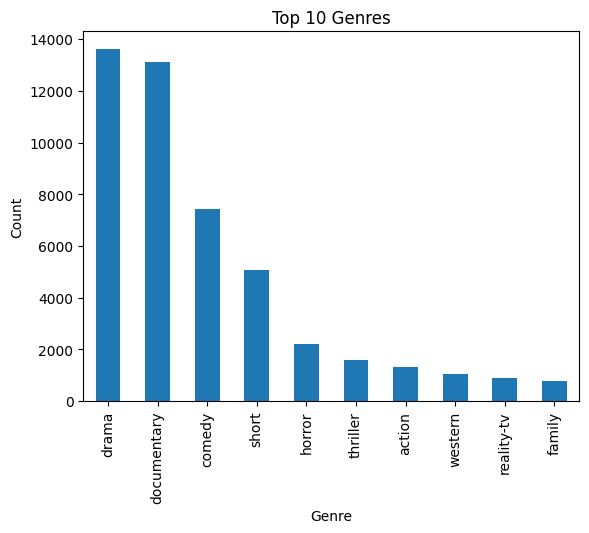

In [83]:
import matplotlib.pyplot as plt

genre_count.head(10).plot(kind='bar')
plt.title("Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


In [84]:
rare_genres = genre_count[genre_count < 1000].index
df['genre'] = df['genre'].replace(rare_genres, 'other')


In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [86]:
df['genre_encode']= le.fit_transform(df['genre'])

In [87]:
df['genre_encode']

,genre_encode
0,3
1,7
2,5
3,3
4,3
...,...
54209,1
54210,4
54211,2
54212,1


In [88]:
df.dtypes

,0
id,int64
title,object
genre,object
description,object
clean_description,object
sentiment,float64
genre_encode,int64


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train,  y_test =train_test_split(
    df['clean_description'],
    df['genre_encode'],
    test_size=0.2,
    random_state=42
)

In [91]:
X_train

,clean_description
19253,sex betrayal seduction manipulation addiction ...
12261,autistic teen tony friendship cameron boy stil...
37143,onehour special examines socially ethnically r...
21965,personal narrative documentary uses bicycle ri...
7033,easygoing village policeman artturi sakari rei...
...,...
11284,david cronenberg wellknown canadian directors ...
44732,adan neumann member jewish family live berlin ...
38158,miranda lesbian photographer guayaquil living ...
860,enemies professional lives chiang chihheng mel...


In [92]:
X_test

,clean_description
5089,catherine stjohnburke independent uptight stat...
30323,beginning century train young woman comes pari...
6415,jerranium little rock made papers buried deep ...
20919,deadly tales anthology three horror shorts unu...
29549,grammy music award american academy audio reco...
...,...
11342,four teenage boys come age oslo time beatleman...
46371,travel comedian michael blackson around countr...
5478,frdrique rich beautiful woman picks female str...
23298,woman drunk dials senator reach voicemail imag...


In [93]:
CV = CountVectorizer(max_features=5000)
x_train_cv = CV.fit_transform(X_train)

In [94]:
x_test_cv = CV.fit_transform(X_test)

In [95]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

In [96]:
model_nb = MultinomialNB()
model_nb.fit(x_train_cv, y_train)

MultinomialNB()

In [97]:
y_pred_nb = model_nb.predict(x_test_cv)
y_pred_nb

array([5, 5, 3, ..., 5, 5, 5])

In [98]:
accuracy_score(y_test, y_pred_nb)

0.1732915244858434

In [99]:
confusion_matrix(y_test, y_pred_nb)

array([[   6,   21,   40,   31,    7,   86,   58,   13,    1],
       [  52,  139,  174,  141,   26,  562,  288,   52,    9],
       [  58,   99,  527,  237,   33,  946,  618,  123,   18],
       [  46,  215,  309,  265,   39, 1184,  533,   93,   13],
       [   7,   43,   46,   30,   11,  158,  118,   17,    1],
       [  53,  125,  235,  158,   26,  695,  412,   78,   14],
       [  26,   80,  168,  103,   17,  388,  218,   35,   10],
       [   5,   30,   31,   39,    7,  106,   73,   16,    2],
       [   7,   11,   35,    5,    2,  100,   37,    1,    2]])

In [100]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.02      0.02      0.02       263
           1       0.18      0.10      0.13      1443
           2       0.34      0.20      0.25      2659
           3       0.26      0.10      0.14      2697
           4       0.07      0.03      0.04       431
           5       0.16      0.39      0.23      1796
           6       0.09      0.21      0.13      1045
           7       0.04      0.05      0.04       309
           8       0.03      0.01      0.01       200

    accuracy                           0.17     10843
   macro avg       0.13      0.12      0.11     10843
weighted avg       0.21      0.17      0.17     10843



In [101]:
tf= TfidfVectorizer(max_features=5000)
x_train_tf = tf.fit_transform(X_train)

In [102]:
x_test_tf = tf.transform(X_test)

In [103]:
model_nb.fit(x_train_tf, y_train)

MultinomialNB()

In [104]:
y_pred_tf= model_nb.predict(x_test_tf)
y_pred_tf

array([3, 3, 5, ..., 3, 6, 4])

In [105]:
accuracy_score(y_test, y_pred_tf)

0.5527068154569769

In [106]:
confusion_matrix(y_test, y_pred_tf)

array([[   9,    8,   33,  145,    3,   63,    0,    2,    0],
       [   1,  544,  109,  631,    5,  152,    1,    0,    0],
       [   1,   25, 2259,  243,    1,  120,    9,    1,    0],
       [   2,  118,  281, 2197,    3,   81,   13,    2,    0],
       [   0,   19,   28,  188,  130,   60,    5,    1,    0],
       [   2,  124,  461,  549,   12,  638,    6,    2,    2],
       [   0,   73,  380,  434,    1,   63,   94,    0,    0],
       [   1,   14,   17,  231,   13,   27,    1,    5,    0],
       [   0,    9,    3,   65,    0,    6,    0,    0,  117]])

In [107]:
print(classification_report(y_test, y_pred_tf))

              precision    recall  f1-score   support

           0       0.56      0.03      0.06       263
           1       0.58      0.38      0.46      1443
           2       0.63      0.85      0.73      2659
           3       0.47      0.81      0.60      2697
           4       0.77      0.30      0.43       431
           5       0.53      0.36      0.42      1796
           6       0.73      0.09      0.16      1045
           7       0.38      0.02      0.03       309
           8       0.98      0.58      0.73       200

    accuracy                           0.55     10843
   macro avg       0.63      0.38      0.40     10843
weighted avg       0.58      0.55      0.51     10843



In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
lr = LogisticRegression(max_iter=5000,  n_jobs=-1, class_weight= "balanced")


In [110]:
lr.fit(x_train_tf, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, n_jobs=-1)

In [111]:
accuracy_score(y_test, y_pred_tf)

0.5527068154569769

In [112]:
confusion_matrix(y_test, y_pred_tf)

array([[   9,    8,   33,  145,    3,   63,    0,    2,    0],
       [   1,  544,  109,  631,    5,  152,    1,    0,    0],
       [   1,   25, 2259,  243,    1,  120,    9,    1,    0],
       [   2,  118,  281, 2197,    3,   81,   13,    2,    0],
       [   0,   19,   28,  188,  130,   60,    5,    1,    0],
       [   2,  124,  461,  549,   12,  638,    6,    2,    2],
       [   0,   73,  380,  434,    1,   63,   94,    0,    0],
       [   1,   14,   17,  231,   13,   27,    1,    5,    0],
       [   0,    9,    3,   65,    0,    6,    0,    0,  117]])

In [113]:
print(classification_report(y_test, y_pred_tf))

              precision    recall  f1-score   support

           0       0.56      0.03      0.06       263
           1       0.58      0.38      0.46      1443
           2       0.63      0.85      0.73      2659
           3       0.47      0.81      0.60      2697
           4       0.77      0.30      0.43       431
           5       0.53      0.36      0.42      1796
           6       0.73      0.09      0.16      1045
           7       0.38      0.02      0.03       309
           8       0.98      0.58      0.73       200

    accuracy                           0.55     10843
   macro avg       0.63      0.38      0.40     10843
weighted avg       0.58      0.55      0.51     10843



In [114]:
from sklearn.svm import SVC

In [115]:
svm = SVC(class_weight="balanced" , kernel="linear")

In [116]:
svm.fit(x_train_tf, y_train)

SVC(class_weight='balanced', kernel='linear')

In [117]:
y_pred_svm = svm.predict(x_test_tf)
y_pred_svm

array([7, 3, 5, ..., 1, 6, 4])

In [118]:
accuracy_score(y_test, y_pred_svm)

0.569860739647699

In [119]:
confusion_matrix(y_test, y_pred_svm)

array([[ 133,   18,   11,   29,   10,   30,    5,   26,    1],
       [  38,  866,   40,  189,   28,  144,   94,   40,    4],
       [  30,   65, 1959,  125,   19,  217,  223,   17,    4],
       [ 105,  372,  170, 1461,   51,  160,  216,  145,   17],
       [  10,   17,    8,   17,  291,   28,   13,   46,    1],
       [ 128,  211,  218,  211,   62,  727,  152,   79,    8],
       [  24,  110,  175,  132,   29,   72,  470,   28,    5],
       [  28,   14,   13,   51,   55,   19,   21,  108,    0],
       [   5,    9,    1,   11,    2,    2,    2,    4,  164]])

In [120]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.27      0.51      0.35       263
           1       0.51      0.60      0.55      1443
           2       0.75      0.74      0.75      2659
           3       0.66      0.54      0.59      2697
           4       0.53      0.68      0.60       431
           5       0.52      0.40      0.46      1796
           6       0.39      0.45      0.42      1045
           7       0.22      0.35      0.27       309
           8       0.80      0.82      0.81       200

    accuracy                           0.57     10843
   macro avg       0.52      0.56      0.53     10843
weighted avg       0.59      0.57      0.57     10843

